# Heart disease prediction by using machine learning algorithms

## Table of contents

* Introduction
* Dataset Description
* Data Wrangling
* Exploratory Data Analysis
* Modeling
* Selecting the Best Model
* Conclusion


## Introduction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs. In this project, We will predict whether or not an individual will suffer a possible heart disease by using statistical or machine learning models: logistic regression, decision tree, random forest, and gradient boosting, and also evaluate and compare these models.

## Dataset Description

The heart disease dataset contains 11 features:
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female] 
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl] 
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] 
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

In [202]:
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
import scipy as sp
import pandas as pd
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns
#
# modeling
#
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#
print("Loaded Libraries")

Loaded Libraries


## Data Wrangling

### Sourcing and loading data

In [203]:
heart = pd.read_csv("heart.csv")
heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [204]:
# Verify data was successfully loaded
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Data Cleaning

In [205]:
# check the features
print('The data have ', heart.shape[0], ' rows and ', heart.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(heart.columns)))

The data have  918  rows and  12  columns

column names: 

Age
Sex
ChestPainType
RestingBP
Cholesterol
FastingBS
RestingECG
MaxHR
ExerciseAngina
Oldpeak
ST_Slope
HeartDisease


Number of Missing values By Column: count the number of missing values in each column and sort them.

In [206]:
# check the missing values
missing = pd.concat([heart.isnull().sum(), 100 * heart.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count','%'])

,count,%
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


Find the categorical Features.

In [207]:
#select columns of dtype 'object'
heart.select_dtypes(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


Explore the categorical Features.

In [208]:
heart['Sex'].value_counts().head()

M    725
F    193
Name: Sex, dtype: int64

In [209]:
heart['ChestPainType'].value_counts().head()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [210]:
heart['RestingECG'].value_counts().head()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [211]:
heart['ExerciseAngina'].value_counts().head()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [212]:
heart['ST_Slope'].value_counts().head()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

## Exploring the data

In [213]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [214]:
# Replace 1 and 0 by 'Yes' and 'No'
heart['HeartDisease'] = heart['HeartDisease'].replace(1.0, 'Yes')
heart['HeartDisease'] = heart['HeartDisease'].replace(0.0, 'No')
heart["HeartDisease"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

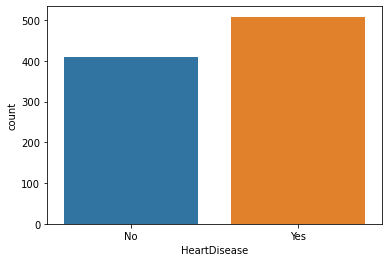

In [215]:
sns.countplot(x=heart["HeartDisease"])

<AxesSubplot:xlabel='Sex', ylabel='count'>

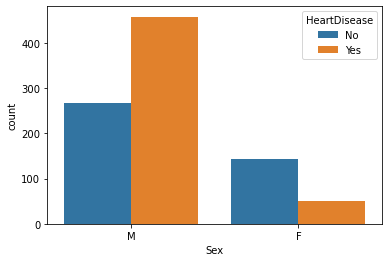

In [216]:
sns.countplot(data=heart, x="Sex", hue="HeartDisease")

The number of male who has heart disease is much lager than the number of male who does not have heart disease. While the number of female who has heart disease is much smaller than the number of female who does not have heart disease.

In [217]:
heart[(heart["Sex"]=='M') & (heart['HeartDisease']=='Yes')].shape

(458, 12)

In [218]:
heart[(heart["Sex"]=='M') & (heart['HeartDisease']=='No')].shape

(267, 12)

In [219]:
heart[(heart["Sex"]=='F') & (heart['HeartDisease']=='Yes')].shape

(50, 12)

In [220]:
heart[(heart["Sex"]=='F') & (heart['HeartDisease']=='No')].shape

(143, 12)

63.2% of male has heart disease, while the number of female who has heart disease is only 25.9%. Men is more likely to have heart disease than women.

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

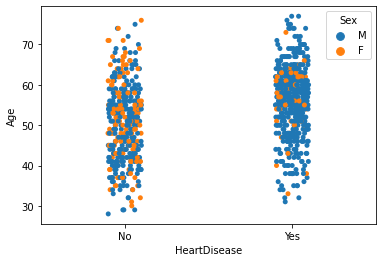

In [221]:
sns.stripplot(data=heart, x="HeartDisease", y="Age",hue="Sex")

The number of male who has heart disease is much more than the number of female who has heart disease. Women who have heart disease are almost in the range of 55 to 65, while men's range is much wider.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

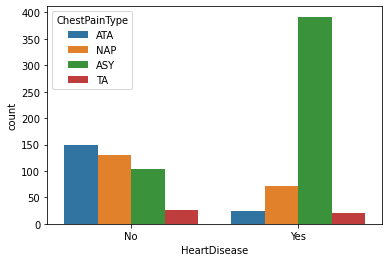

In [222]:
sns.countplot(data=heart, x="HeartDisease", hue="ChestPainType")

Silent heart attacks are much more than those who has symptoms. They are described as “silent” because when they occur, their symptoms lack the intensity of a classic heart attack, such as extreme chest pain and pressure; stabbing pain in the arm, neck, or jaw; sudden shortness of breath; sweating, and dizziness.

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

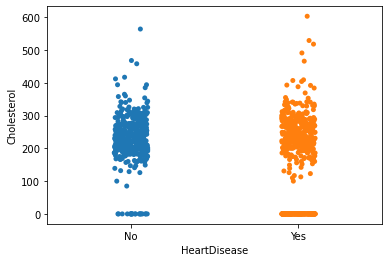

In [223]:
sns.stripplot(data=heart, x="HeartDisease", y="Cholesterol")

<AxesSubplot:xlabel='HeartDisease', ylabel='RestingBP'>

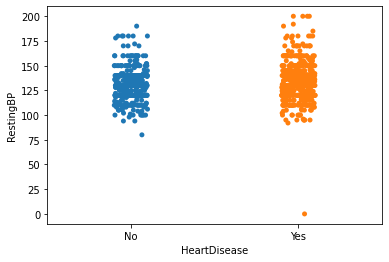

In [224]:
sns.stripplot(data=heart, x="HeartDisease", y="RestingBP")

In [225]:
heart["FastingBS"].unique()

array([0, 1])

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

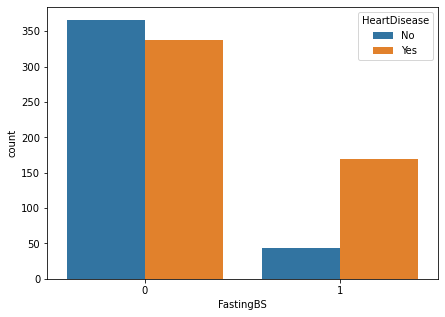

In [226]:
plt.figure(figsize=(7,5))
sns.countplot(data=heart, x="FastingBS", hue="HeartDisease")

When fasting blood sugar > 120 mg/dl, the number of people who have heart disease are far more than the number of people who do not have heart disease.

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

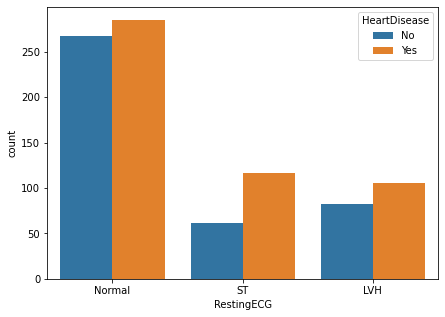

In [227]:
plt.figure(figsize=(7,5))
sns.countplot(data=heart, x="RestingECG", hue="HeartDisease")

When patients' resting electrocardiogram results show abnormal, the number of patients who have heart disease are much larger than the number of patients who do not have heart disease.

<AxesSubplot:xlabel='HeartDisease', ylabel='MaxHR'>

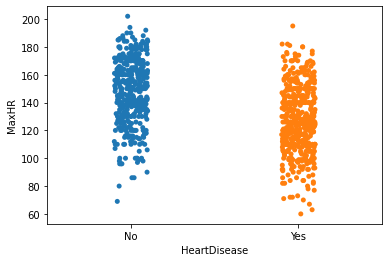

In [228]:
sns.stripplot(data=heart, x="HeartDisease", y="MaxHR")

Maximum heart rate achieved of patients who have heart disease are lower than patients who do not have heart disease.

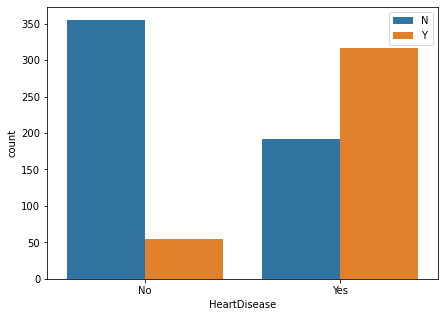

In [229]:
plt.figure(figsize=(7,5))
sns.countplot(data=heart, x="HeartDisease", hue="ExerciseAngina")
plt.legend(loc='upper right')

Patients who have heart disease have exercise-induced angina are more than those do not have angina. Very little patients who do not have heart disease but have angina.

In [230]:
heart["Oldpeak"].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

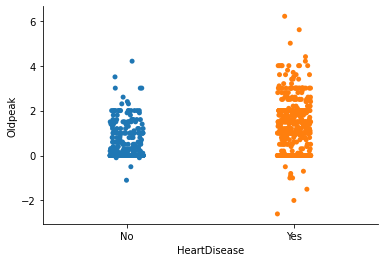

In [231]:
sns.stripplot(data=heart, x="HeartDisease", y="Oldpeak")
sns.despine()

The number of ST depression induced by exercise relative to rest spread more widely when patients have heart diseases, which means patients who have heart disease may have extreme high or low oldpeak number.

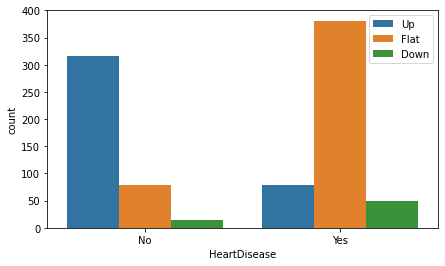

In [232]:
plt.figure(figsize=(7,4))
sns.countplot(data=heart, x="HeartDisease", hue="ST_Slope")
plt.legend(loc='upper right')

The number of flat result in slope of the peak exercise ST segment is much larger than up and down result when patients have heart disease.

### Transformation of categorical features

In [233]:
categorical_features = ['Sex',
                        'ChestPainType',
                        'RestingECG',
                        'ExerciseAngina',
                        'ST_Slope']
heart = pd.get_dummies(heart, columns = categorical_features)
print('The data have ', heart.shape[0], ' rows and ', heart.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(heart.columns)))

The data have  918  rows and  21  columns

column names: 

Age
RestingBP
Cholesterol
FastingBS
MaxHR
Oldpeak
HeartDisease
Sex_F
Sex_M
ChestPainType_ASY
ChestPainType_ATA
ChestPainType_NAP
ChestPainType_TA
RestingECG_LVH
RestingECG_Normal
RestingECG_ST
ExerciseAngina_N
ExerciseAngina_Y
ST_Slope_Down
ST_Slope_Flat
ST_Slope_Up


In [234]:
# poportion class, class count
class_counts = heart['HeartDisease'].value_counts()
class_counts

Yes    508
No     410
Name: HeartDisease, dtype: int64

In [235]:
type(class_counts)

pandas.core.series.Series

In [236]:
class_percentages = pd.Series([(x / heart.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    55.337691
1    44.662309
dtype: float64

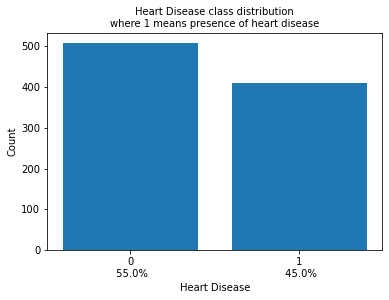

In [237]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Heart Disease')
ax.set_title('Heart Disease class distribution\nwhere 1 means presence of heart disease',
              fontsize = 10)
plt.show()

#### Balanced and Imbalanced Classes
For a binary classification problem (two classes), the problem is called balanced if the number of elements of each class is about the same--in other words, each class would have a size that is about 50% of the total number of elements in the dataset. In this particular case study, one would say that this problem is slightly imbalanced, since the difference in the percentages is about 10%. When there is a imbalance among the classes in a binary classification problem, one usually refers to them as the minority class, and the majority class.

In practice, Imbalanced Classification Problems (ICP) are very common in situations where one is modeling events that are not common, and thus these events would be instances of the minority class. Examples of these problems include: study of diseases such as Cancer, study of processes such as fraud, and--in general--the study of rare anomalies within a system. 

Since this particular case study deals with a slight imbalance among the classes, we might be able to build useful models with the given dataset--without introducing additional interventions.

### Building a Logistic Regression Model with Only Two Features

In [238]:
# train/test split
Xtrain, Xtest, ytrain, ytest = train_test_split(heart[['Cholesterol','RestingBP']],
                                                heart['HeartDisease'],
                                                train_size = 0.80,
                                                random_state = 42)

In [239]:
classifier = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)

In [240]:
classifier.fit(Xtrain, ytrain)

LogisticRegression(C=1000, max_iter=500, solver='liblinear')

In [241]:
print(f'Accuracy on training data: {accuracy_score(classifier.predict(Xtrain), ytrain):.2f}')

Accuracy on training data: 0.61


In [242]:
print(f'Accuracy on test data: {accuracy_score(classifier.predict(Xtest), ytest):.2f}')

Accuracy on test data: 0.54


In [243]:
print("Classification Report for Training Data")
print(classification_report(ytrain, classifier.predict(Xtrain)))

Classification Report for Training Data
              precision    recall  f1-score   support

          No       0.57      0.55      0.56       333
         Yes       0.64      0.66      0.65       401

    accuracy                           0.61       734
   macro avg       0.60      0.60      0.60       734
weighted avg       0.61      0.61      0.61       734



In [244]:
print("Classification Report for Test Data")
print(classification_report(ytest, classifier.predict(Xtest)))

Classification Report for Test Data
              precision    recall  f1-score   support

          No       0.45      0.47      0.46        77
         Yes       0.61      0.59      0.60       107

    accuracy                           0.54       184
   macro avg       0.53      0.53      0.53       184
weighted avg       0.54      0.54      0.54       184



The model with only two features isn't very good! The accuracy on the training data is only 61%, and the accuracy on the testing data is barely better than random chance (54%)--where random chance if 50%. This isn't surprising since we are using only two features. 

Moreover, notice that the classification report shows that the model performs poorly when trying to recognize inputs that belong to class "No", which is indicated by the poor values of precision, recall, and f1-score for class "No"--for the training set and test set.


Since the gap between training and testing accuracy is about 7%, one might say that the model is slightly over-fitting the data. Thus, in general, one says that a model is over-fitting (or just overfitting), when there is an important gap between its training performance and its test performance.

## Building a Logistic Regression Model with all Features

In [245]:
# define x and y
X = heart.drop(columns = ['HeartDisease'])
print("X: ", type(X), X.shape)

X:  <class 'pandas.core.frame.DataFrame'> (918, 20)


In [246]:
y = heart['HeartDisease']
print("y: ", type(y), y.shape)

y:  <class 'pandas.core.series.Series'> (918,)


In [247]:
list(X.columns)

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [248]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, train_size = 0.80,
                                                random_state = 42)
print('Training split has ', Xlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ylr))+ ')')
print('Test split has ', Xtestlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ytestlr)) + ')')

Training split has  734  rows
 and the corresponding labels have an equal number of values. (734)
Test split has  184  rows
 and the corresponding labels have an equal number of values. (184)


In [249]:
clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)

In [250]:
# build the model
clf.fit(Xlr, ylr) 

LogisticRegression(max_iter=500, solver='newton-cg')

In [251]:
# Predict with the built model
y_predict_test = clf.predict(Xtestlr)
y_predict_training = clf.predict(Xlr)

In [252]:
print("[Test] Accuracy score (y_predict_test, ytestlrstrat):",
      f'{accuracy_score(y_predict_test, ytestlr):.2f}')

[Test] Accuracy score (y_predict_test, ytestlrstrat): 0.85


In [253]:
print("[Test] Accuracy score: (ytestlr, y_predict_test) [**note reversed order]", 
      f'{accuracy_score(ytestlr, y_predict_test):.2f}')

[Test] Accuracy score: (ytestlr, y_predict_test) [**note reversed order] 0.85


In [254]:
print("[Training] Accuracy score: (ylr, y_predict_training)", 
      f'{accuracy_score(ylr, y_predict_training):.2f}')

[Training] Accuracy score: (ylr, y_predict_training) 0.87


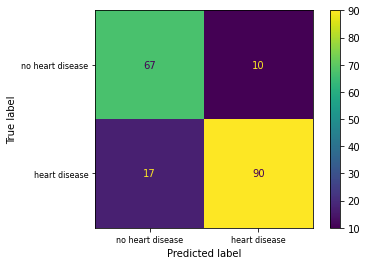

In [255]:
#confusion matrix
cm = confusion_matrix(ytestlr, y_predict_test, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no heart disease', 'heart disease'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
ax.set_yticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
display_cm.plot(ax = ax)

From the chart we can see that while the overall accuracy was 85%, when we predict heart disease, 10% (10 of 100) of the time we are predicting a false positive, while the false negatives (predicting no disease when in fact there is heart disease) is about 20% (17 of 84). This information can be discussed with stakeholders to decide which is more important, reducing false positives or false negatives, assuming overall accuracy is acceptable. 

In [256]:
print(classification_report(ylr, y_predict_training))

              precision    recall  f1-score   support

          No       0.87      0.84      0.86       333
         Yes       0.87      0.90      0.88       401

    accuracy                           0.87       734
   macro avg       0.87      0.87      0.87       734
weighted avg       0.87      0.87      0.87       734



In [257]:
print(classification_report(ytestlr, y_predict_test))

              precision    recall  f1-score   support

          No       0.80      0.87      0.83        77
         Yes       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



Some comments for this model:

The model's training accuracy (0.87) is pretty good (meaning, close to 1--or 100%), then one says there is only a small "bias" in the model.

Since the model's test accuracy (0.85) is decently close to the training accuracy, we would say that there is a small "variance" between the training accuracy and the test accuracy. This is an indication that the model will "generalize well", which means that the model will be well-behaved when new data is presented to it.

Overfitting in this model is diminished.


### Descion Tree modeling

In [258]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
from graphviz import Digraph
import pydotplus

In [259]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = DecisionTreeClassifier(criterion='entropy', random_state=1234)

# built the model
entr_model.fit(Xlr, ylr)

# Predict with the built model
y_predict_test_en = entr_model.predict(Xtestlr)
y_predict_training_en = entr_model.predict(Xlr)

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

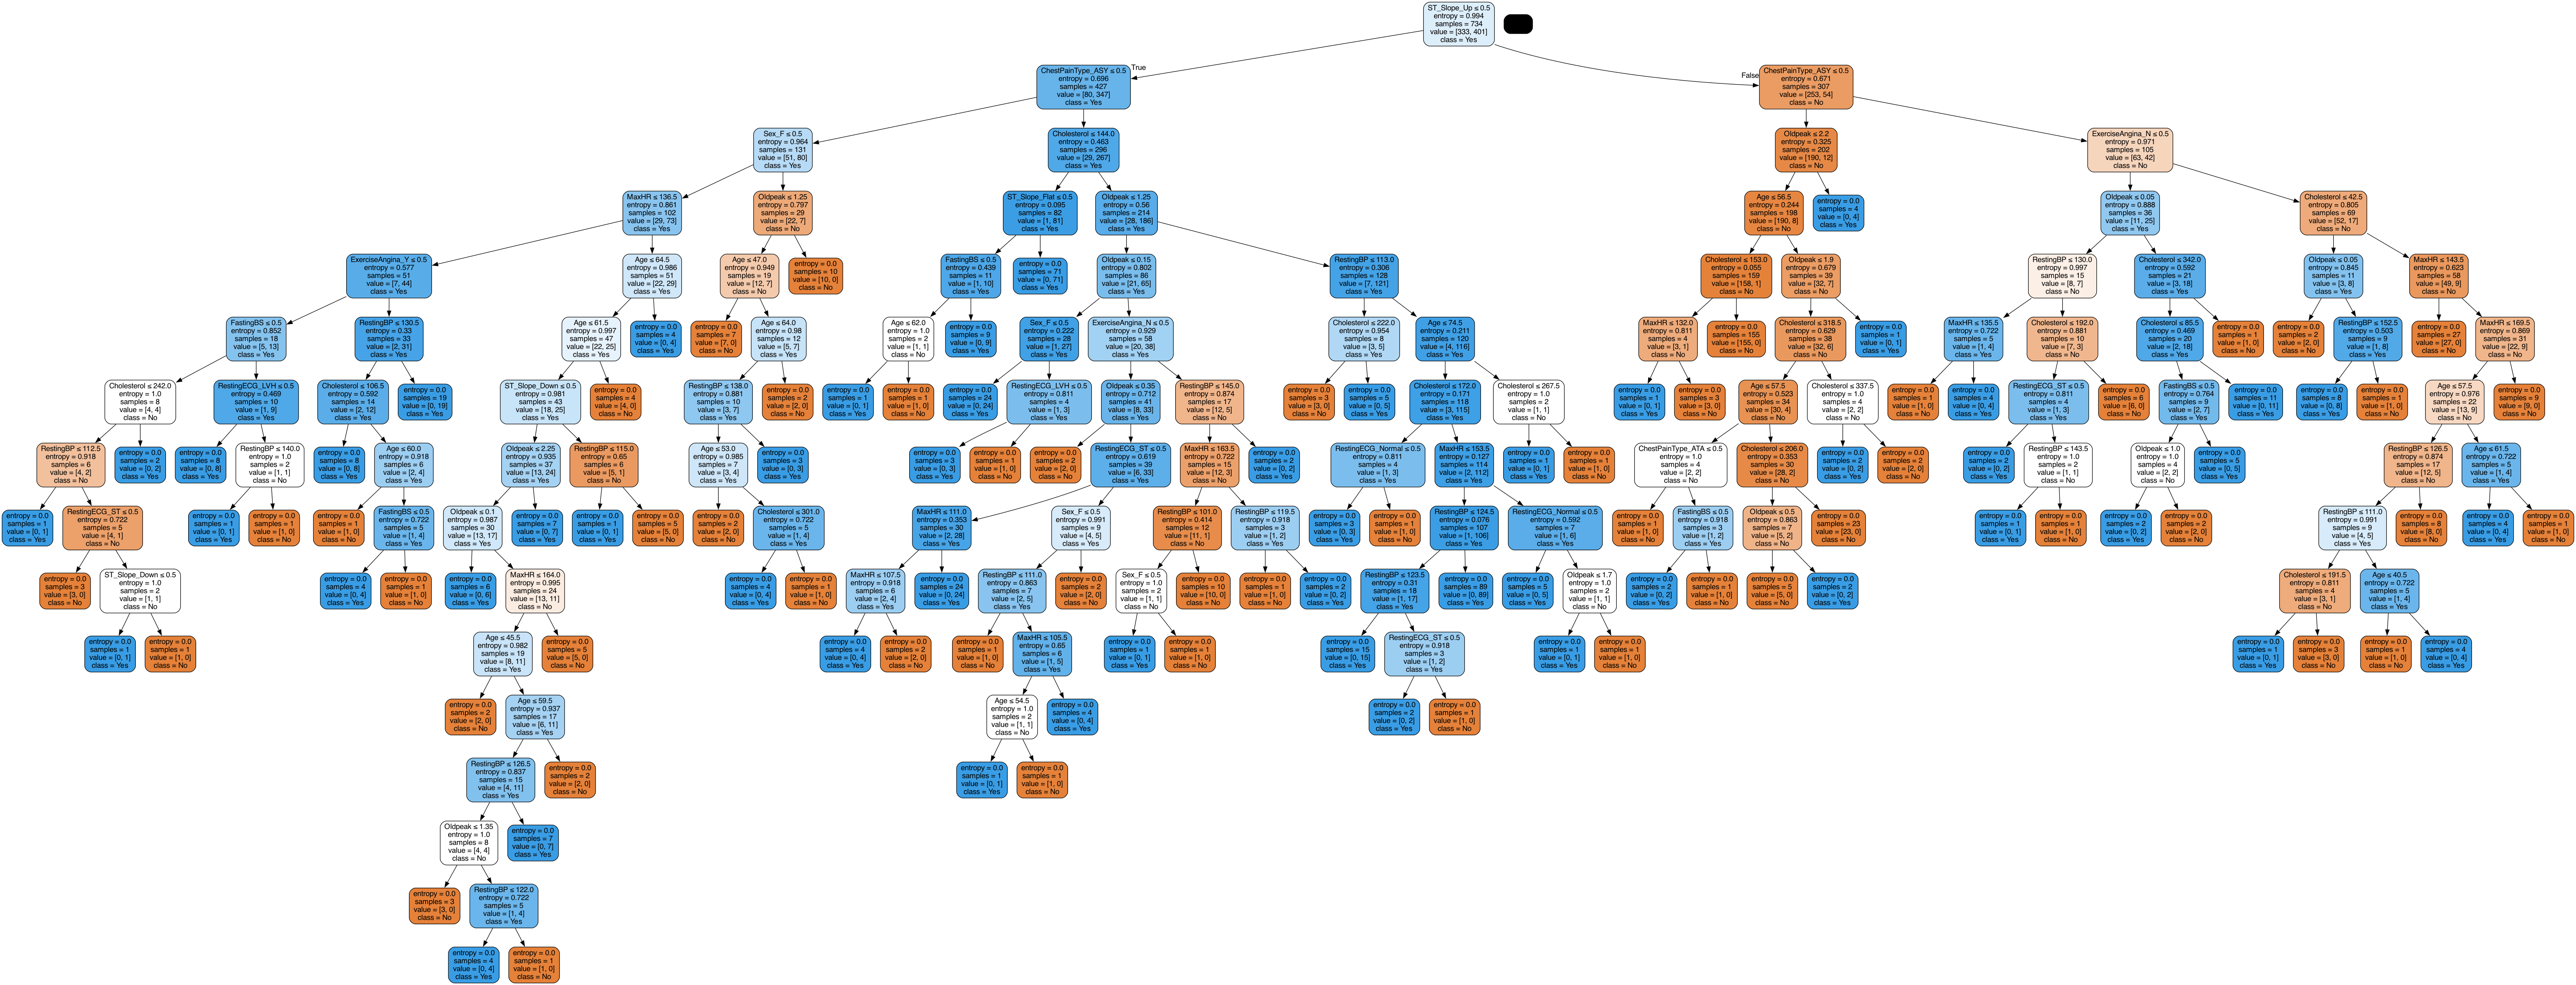

In [260]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=Xlr.columns,class_names = ["No", "Yes"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [261]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(ytestlr,y_predict_test_en))
print("Balanced accuracy:", metrics.balanced_accuracy_score(ytestlr,y_predict_test_en))
print('Precision score for "Yes"' , metrics.precision_score(ytestlr,y_predict_test_en, pos_label = "Yes"))
print('Precision score for "No"' , metrics.precision_score(ytestlr,y_predict_test_en, pos_label = "No"))
print('Recall score for "Yes"' , metrics.recall_score(ytestlr,y_predict_test_en, pos_label = "Yes"))
print('Recall score for "No"' , metrics.recall_score(ytestlr,y_predict_test_en, pos_label = "No"))

# Compute and print the confusion matrix and classification report:
print('Classification Report:')
print(classification_report(ytestlr, y_predict_test_en))

Model Entropy - no max depth
Accuracy: 0.8097826086956522
Balanced accuracy: 0.8218837237528827
Precision score for "Yes" 0.9090909090909091
Precision score for "No" 0.71875
Recall score for "Yes" 0.7476635514018691
Recall score for "No" 0.8961038961038961
Classification Report:
              precision    recall  f1-score   support

          No       0.72      0.90      0.80        77
         Yes       0.91      0.75      0.82       107

    accuracy                           0.81       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.83      0.81      0.81       184



Decision tree models does not improved compared to logistic regression model.You might have noticed an important fact about decision trees. Each time we run a given decision tree algorithm to make a prediction (such as whether customers will buy the Hidden Farm coffee) we will actually get a slightly different result. This might seem weird, but it has a simple explanation: machine learning algorithms are by definition *stochastic*, in that their output is at least partly determined by randomness.

To account for this variability and ensure that we get the most accurate prediction, we might want to actually make lots of decision trees, and get a value that captures the centre or average of the outputs of those trees. Luckily, there's a method for this, known as the *Random Forest*.



## Random Forest Model

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.graph_objects as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

### Scale data to prep for model creation

In [263]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(Xlr)
X_train_scaled=scaler.transform(Xlr)
X_test_scaled=scaler.transform(Xtestlr)

In [264]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

### Fit Random Forest Classifier

In [265]:
from sklearn.ensemble import RandomForestClassifier
clf_res = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf_res.fit(X_train_scaled, ylr)
y_pred_res = model_res.predict(X_test_scaled)
y_pred_res_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_res_prob[:,1]
ac = accuracy_score(ytestlr, y_pred_res)

f1 = f1_score(ytestlr, y_pred_res, average='weighted')
cm = confusion_matrix(ytestlr, y_pred_res)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

# Compute and print the confusion matrix and classification report:
print('Classification Report:')
print(classification_report(ytestlr, y_pred_res))

Random Forest: Accuracy=0.870
Random Forest: f1-score=0.870
Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.86      0.85        77
         Yes       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



20


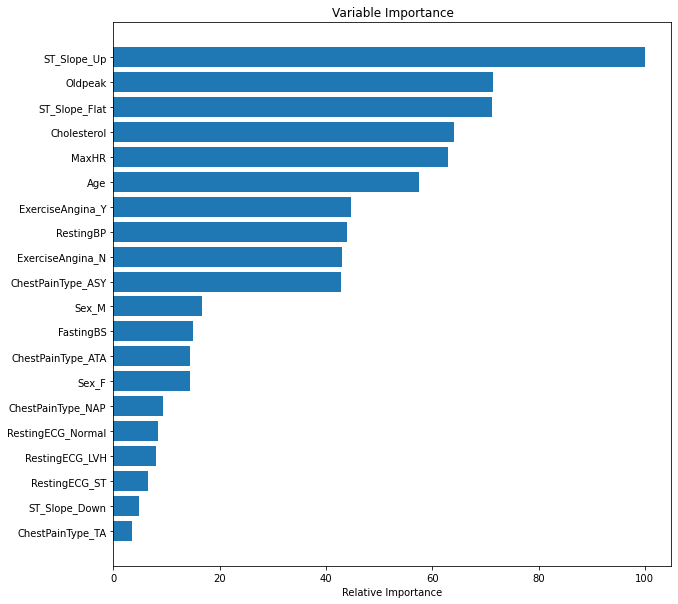

In [266]:
feature_importance = clf_res.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The popularity of random forest is primarily due to how well it performs in a multitude of data situations. It tends to handle highly correlated features well, where as a linear regression model would not. In this case study we demonstrate the performance ability even with only a few features and almost all of them being highly correlated with each other. Random Forest is also used as an efficient way to investigate the importance of a set of features with a large data set. Consider random forest to be one of your first choices when building a decision tree, especially for multiclass classifications.

## Gradient boosting

In [267]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

### Test learning rate

In [268]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train_scaled, ylr)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_scaled, ylr)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test_scaled, ytestlr)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.871
Accuracy score (validation): 0.859

Learning rate:  0.1
Accuracy score (training): 0.875
Accuracy score (validation): 0.859

Learning rate:  0.25
Accuracy score (training): 0.884
Accuracy score (validation): 0.880

Learning rate:  0.5
Accuracy score (training): 0.887
Accuracy score (validation): 0.864

Learning rate:  0.75
Accuracy score (training): 0.895
Accuracy score (validation): 0.837

Learning rate:  1
Accuracy score (training): 0.898
Accuracy score (validation): 0.864



In [269]:
Learning_rate = 0.25

## Create the classifier:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = Learning_rate, 
                                max_features=2, max_depth = 2, random_state = 0)

# Fit the classifier to the training data
gb.fit(X_train_scaled, ylr)

# Predict the labels of the test set: y_pred
y_pred_gb = gb.predict(X_test_scaled)

# Compute and print the confusion matrix and classification report:
print('Classification Report:')
print(classification_report(ytestlr, y_pred_gb))

Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.88      0.86        77
         Yes       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



20


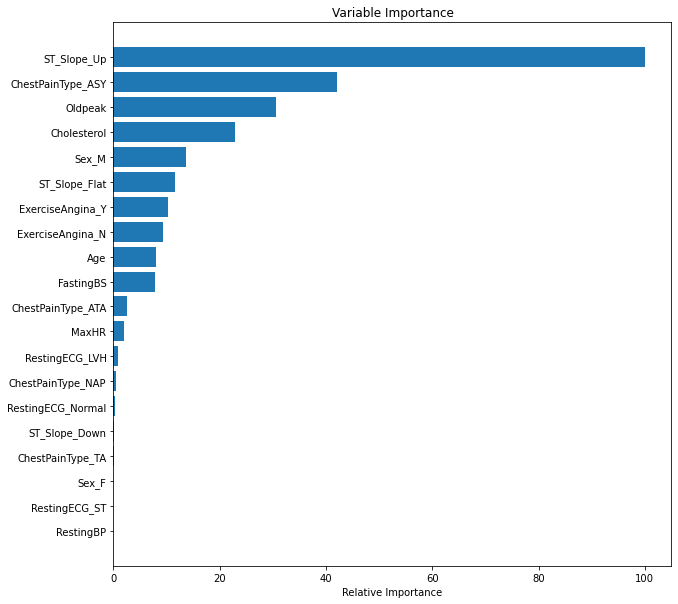

In [270]:
feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The random forest and XGboost perform better than descison tree and logistic regression, but we want to see more difference if we drop some features that are not less important.

### Build the model by dropping some less important features

#### Random Forest

In [178]:
# define x and y
Xd = heart.drop(columns = ['HeartDisease','ChestPainType_NAP','RestingECG_Normal','RestingECG_LVH',
                          'RestingECG_ST','ST_Slope_Down','ChestPainType_TA'])
print("X: ", type(X), X.shape)

X:  <class 'pandas.core.frame.DataFrame'> (918, 20)


In [179]:
yd = heart['HeartDisease']
print("y: ", type(y), y.shape)

y:  <class 'pandas.core.series.Series'> (918,)


In [180]:
list(Xd.columns)

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [181]:
Xdlr, Xdtestlr, ydlr, ydtestlr = train_test_split(Xd, yd, train_size = 0.80,
                                                random_state = 42)
print('Training split has ', Xdlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ydlr))+ ')')
print('Test split has ', Xdtestlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ydtestlr)) + ')')

Training split has  734  rows
 and the corresponding labels have an equal number of values. (734)
Test split has  184  rows
 and the corresponding labels have an equal number of values. (184)


In [182]:
#scale data
scaler = preprocessing.StandardScaler().fit(Xdlr)
Xd_train_scaled=scaler.transform(Xdlr)
Xd_test_scaled=scaler.transform(Xdtestlr)

In [183]:
clf_d_res = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_d_res = clf_res.fit(Xd_train_scaled, ylr)
yd_pred_res = model_d_res.predict(Xd_test_scaled)
yd_pred_res_prob = model_d_res.predict_proba(Xd_test_scaled)
lr_d_probs = yd_pred_res_prob[:,1]
ac_d = accuracy_score(ydtestlr, yd_pred_res)

f1 = f1_score(ytestlr, y_pred_res, average='weighted')
cm = confusion_matrix(ytestlr, y_pred_res)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

# Compute and print the confusion matrix and classification report:
print('Classification Report:')
print(classification_report(ytestlr, y_pred_res))

Random Forest: Accuracy=0.870
Random Forest: f1-score=0.870
Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.86      0.85        77
         Yes       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



#### XGboost

In [184]:
# define x and y
Xdg = heart.drop(columns = ['HeartDisease','RestingECG_Normal',
                          'RestingECG_ST','ST_Slope_Down','ChestPainType_TA','Sex_F','RestingBP'])
print("X: ", type(X), X.shape)

X:  <class 'pandas.core.frame.DataFrame'> (918, 20)


In [185]:
ydg = heart['HeartDisease']
print("y: ", type(y), y.shape)

y:  <class 'pandas.core.series.Series'> (918,)


In [186]:
list(Xdg.columns)

['Age',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'RestingECG_LVH',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [187]:
Xdglr, Xdgtestlr, ydglr, ydgtestlr = train_test_split(Xdg, ydg, train_size = 0.80,
                                                random_state = 42)
print('Training split has ', Xdglr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ydglr))+ ')')
print('Test split has ', Xdgtestlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ydgtestlr)) + ')')

Training split has  734  rows
 and the corresponding labels have an equal number of values. (734)
Test split has  184  rows
 and the corresponding labels have an equal number of values. (184)


In [188]:
#scale data
scaler = preprocessing.StandardScaler().fit(Xdglr)
Xdg_train_scaled=scaler.transform(Xdglr)
Xdg_test_scaled=scaler.transform(Xdgtestlr)

In [189]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(Xd_train_scaled, ydlr)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(Xdg_train_scaled, ydglr)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(Xdg_test_scaled, ydgtestlr)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.812
Accuracy score (validation): 0.793

Learning rate:  0.1
Accuracy score (training): 0.812
Accuracy score (validation): 0.793

Learning rate:  0.25
Accuracy score (training): 0.787
Accuracy score (validation): 0.761

Learning rate:  0.5
Accuracy score (training): 0.741
Accuracy score (validation): 0.679

Learning rate:  0.75
Accuracy score (training): 0.674
Accuracy score (validation): 0.598

Learning rate:  1
Accuracy score (training): 0.680
Accuracy score (validation): 0.647



In [190]:
Learning_rate = 0.1

## Create the classifier:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = Learning_rate, 
                                max_features=2, max_depth = 2, random_state = 0)

# Fit the classifier to the training data
gb.fit(Xdg_train_scaled, ydglr)

# Predict the labels of the test set: y_pred
ydg_pred_gb = gb.predict(Xdg_test_scaled)

# Compute and print the confusion matrix and classification report:
print('Classification Report:')
print(classification_report(ydgtestlr, ydg_pred_gb))

Classification Report:
              precision    recall  f1-score   support

          No       0.75      0.79      0.77        77
         Yes       0.84      0.81      0.83       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



After dropping the less important features, the model does not improved. So we still choose the model with all features.

## Evaluating and concluding

### How many patients will have heart disease?

In [271]:
# Call value_counts()
heart["HeartDisease"].value_counts()

Yes    508
No     410
Name: HeartDisease, dtype: int64

In [272]:
list(X)

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [273]:
scaler = preprocessing.StandardScaler().fit(Xlr)
X_scaled=scaler.transform(X)


In [274]:
potential_heartdis = gb.predict(X_scaled)

In [275]:
# Call unique() on np, and pass potential_buyers and return_counts=True 
np.unique(potential_heartdis, return_counts=True)

(array(['No', 'Yes'], dtype=object), array([401, 517]))

In [276]:
# Let's calculate the proportion of patients who will get the heart disease
517/908

0.5693832599118943

In [277]:
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model 
print(round((517/908)*100, 2), "% of patients will get heart disease." ) 

56.94 % of patients will get heart disease.
